## Speedtest import workflow
### Follow steps to import global data, extract AUS, check unique (line count) and save locally and figshare
Created: Richard Ferrers, 18/11/22 CC_BY

In [1]:
# https://github.com/teamookla/ookla-open-data/blob/master/tutorials/aggregate_by_county_py.ipynb
# Speedtest Jupyter Notebook - demonstration code
# Pandas cheatsheet - https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
# https://colab.research.google.com/drivespeedtest/.../geopandas.ipynb
%matplotlib inline
# !pip install geopandas
# !pip install shapely
# !pip install rtree
# !apt-get install -y libspatialindex-dev
from datetime import datetime

import geopandas as gp
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from shapely.geometry import Point
# from adjustText import adjust_text - this library not loaded

/Users/rf/anaconda3/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
def quarter_start(year: int, q: int) -> datetime:
    if not 1 <= q <= 4:
        raise ValueError("Quarter must be within [1, 2, 3, 4]")

    month = [1, 4, 7, 10]
    return datetime(year, month[q - 1], 1)


def get_tile_url(service_type: str, year: int, q: int) -> str:
    dt = quarter_start(year, q)

    base_url = "https://ookla-open-data.s3-us-west-2.amazonaws.com/shapefiles/performance"
    url = f"{base_url}/type%3D{service_type}/year%3D{dt:%Y}/quarter%3D{q}/{dt:%Y-%m-%d}_performance_fixed_tiles.zip"
    return url

#speedtest import data from aws

In [13]:
tile_url = get_tile_url("fixed", 2023, 2)
tile_url
#let's load Q2, Q3 22 data

'https://ookla-open-data.s3-us-west-2.amazonaws.com/shapefiles/performance/type%3Dfixed/year%3D2023/quarter%3D2/2023-04-01_performance_fixed_tiles.zip'

In [14]:
print (datetime.now())
# tells me how long takes to import data

2023-08-11 16:45:45.585809


In [15]:
tiles = gp.read_file(tile_url)
# load times - 30 mins (Sun pm), 8 mins (Mon am), 12mins (Sun pm), 11mins (Sat pm)
# load time -  12 mins (Fri am), 14 mins (Fri am)
# load time - 6 mins, (Fri pm),  6 mins (Fri pm) (now at 100Mbps, was 50Mbps)
# load time - x mins (Fri pm) (on 100Mbps NBN)

In [16]:
print (datetime.now())

2023-08-11 16:54:00.158059


In [18]:
len(tiles)
# Q1 21 - 6.3M lines
# Q2 21 - 6.7M lines (global)
# Q3 21 - 6.9M lines
# Q4 21 - 6.7M lines (AU 86115 lines)
# Q1 22 - 6.7M lines (AU 88182 lines)
# Q2 22 - 6.6M lines (AU 86704 lines)
# Q3 22 - 6.609M lines (AU 83458 lines)
# Q1 23 - 6.334M lines (AU 89619 lines)
# Q2 23 - 6.370M lines (AU 90258 lines)

# how to save/load
#au_tiles.to_file("speedtest-AUS-Q221.geojson", driver='GeoJSON')
#working - reloaded successfully
# au2_tiles = gp.read_file("speedtest.geojson")

6370328

In [19]:
au_tiles = tiles.cx[113.338953:153.569469 ,	-43.634597:-10.668186]
#LAX = tiles.cx[-118:-120, 33:35]
len(au_tiles)
# processing World data to Australia subset by bounding box
# source of Bounding Box - World data set
# processing time - 5 mins, 9 mins

90258

In [21]:
au_tiles.to_file("speedtest-AUS-Q223.geojson", driver='GeoJSON')

#write to disk
# then load to figshare: CC-BY-NC https://doi.org/10.6084/m9.figshare.13370504 (Currently at.v22)

/Users/rf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


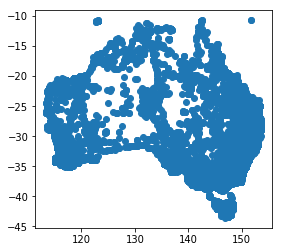

In [24]:
au_tiles.centroid.plot()
# Visual data inspection
# Q222 - looks like some E.Timor data or Coral Sea (New Guinea?)

In [22]:
au_tiles['avg_d_kbps'].mean()
# Q2 21 - 52314
# Q3 21 - 54854
# Q4 21 - 57645
# Q1 22 - 56873
# Q2 22 - 58442
# Q3 22 - 61658
# Q1 23 - 69696
# Q2 23 - 74254


74254.03398036739

In [23]:
au_tiles.describe()

,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices
count,90258.000000,90258.000000,90258.000000,90258.000000,90258.000000
mean,74254.033980,16100.573578,42.373053,15.718186,5.093399
std,57376.216631,17932.383594,96.417119,29.980078,8.417156
min,4.000000,2.000000,0.000000,1.000000,1.000000
25%,38271.250000,8737.000000,11.000000,2.000000,1.000000
50%,58841.000000,14731.000000,19.000000,5.000000,2.000000
75%,94449.250000,18709.000000,40.000000,18.000000,6.000000
max,902732.000000,790360.000000,2523.000000,1140.000000,488.000000


In [25]:
# to do - post to Figshare DONE.
# plot AUS line histogram.
au_tiles

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry
6254050,3101033321331111,13512,14259,8,12,2,"POLYGON ((123.04138 -10.74697, 123.04688 -10.7..."
6254051,3101033321331112,6062,7043,6,1,1,"POLYGON ((123.03589 -10.75237, 123.04138 -10.7..."
6254052,3101033321331122,20344,19220,5,2,1,"POLYGON ((123.02490 -10.76316, 123.03040 -10.7..."
6254053,3101033321331132,25170,9324,5,5,3,"POLYGON ((123.03589 -10.76316, 123.04138 -10.7..."
6254054,3101033321331312,14493,7548,5,2,1,"POLYGON ((123.03589 -10.77395, 123.04138 -10.7..."
...,...,...,...,...,...,...,...
6362338,3130102100120212,24301,2991,48,1,1,"POLYGON ((147.84302 -43.15310, 147.84851 -43.1..."
6362339,3130102100120222,16595,8938,49,1,1,"POLYGON ((147.83203 -43.16112, 147.83752 -43.1..."
6362340,3130102100120233,79077,9136,36,1,1,"POLYGON ((147.84851 -43.16112, 147.85400 -43.1..."
6362341,3130102100120320,23235,7123,64,11,2,"POLYGON ((147.85400 -43.15711, 147.85950 -43.1..."


/Users/rf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


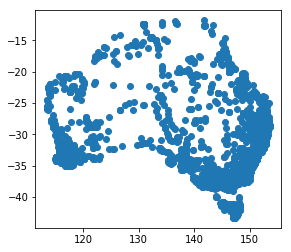

In [32]:
au_tiles.loc[au_tiles['avg_d_kbps'] > 200000].centroid.plot()

In [35]:
au_tiles.loc[au_tiles['avg_d_kbps'] >200000]
#Q2 23 - records over 200Mbps - 3514

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry
6255230,3101213331133322,220223,3915,593,1,1,"POLYGON ((123.72803 -16.12499, 123.73352 -16.1..."
6255231,3101213331133323,237772,43841,117,2,1,"POLYGON ((123.73352 -16.12499, 123.73901 -16.1..."
6255236,3101222322221303,217762,3911,159,2,2,"POLYGON ((113.97766 -21.88699, 113.98315 -21.8..."
6255237,3101222322221310,253513,25878,29,1,1,"POLYGON ((113.98315 -21.88189, 113.98865 -21.8..."
6255268,3101222333020112,228146,26913,35,5,1,"POLYGON ((114.99390 -21.70337, 114.99939 -21.7..."
...,...,...,...,...,...,...,...
6362277,3130102010332301,281458,12603,53,2,1,"POLYGON ((147.24426 -43.30919, 147.24976 -43.3..."
6362282,3130102011002321,237724,8649,48,2,1,"POLYGON ((147.33215 -43.12504, 147.33765 -43.1..."
6362283,3130102011201112,220452,13642,54,1,1,"POLYGON ((147.38159 -43.20117, 147.38708 -43.2..."
6362286,3130102011220002,227900,16575,52,1,1,"POLYGON ((147.30469 -43.26521, 147.31018 -43.2..."


In [37]:
au_tiles.loc[au_tiles['avg_d_kbps'] <10000]
#Q2 23 - records less 10Mbps - 3144

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry
6254051,3101033321331112,6062,7043,6,1,1,"POLYGON ((123.03589 -10.75237, 123.04138 -10.7..."
6254057,3101033323012310,1913,1946,6,1,1,"POLYGON ((122.81616 -10.89804, 122.82166 -10.8..."
6254059,3101033323030111,9519,20443,6,1,1,"POLYGON ((122.82166 -10.91962, 122.82715 -10.9..."
6255233,3101213333201311,1589,786,591,1,1,"POLYGON ((123.48083 -16.48876, 123.48633 -16.4..."
6255239,3101222322300133,2291,1600,716,1,1,"POLYGON ((114.12048 -21.79521, 114.12598 -21.7..."
...,...,...,...,...,...,...,...
6362255,3130102010223302,7764,691,78,2,2,"POLYGON ((147.01904 -43.31319, 147.02454 -43.3..."
6362278,3130102010332322,1668,920,86,5,3,"POLYGON ((147.23877 -43.32118, 147.24426 -43.3..."
6362288,3130102012000033,4986,4716,79,1,1,"POLYGON ((146.96960 -43.33716, 146.97510 -43.3..."
6362304,3130102012110102,5012,2482,117,2,2,"POLYGON ((147.23877 -43.32917, 147.24426 -43.3..."


/Users/rf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


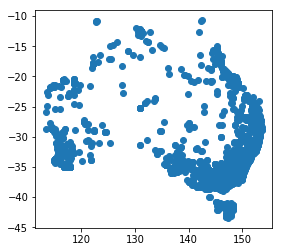

In [38]:
au_tiles.loc[au_tiles['avg_d_kbps'] <10000].centroid.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8479e24940>]],
      dtype=object)

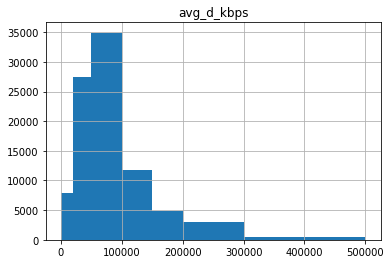

In [52]:
#df.hist(column='session_duration_seconds', bins=25, bins=[0,.5,.75,1]))
au_tiles.hist(column='avg_d_kbps', bins=[0,20000, 50000, 100000, 150000, 200000, 300000, 500000])